# Welcome to Week 2!

## Frontier Model APIs

In Week 1, we used multiple Frontier LLMs through their Chat UI, and we connected with the OpenAI's API.

Today we'll connect with the APIs for Anthropic and Google, as well as OpenAI.

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../important.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#900;">Important Note - Please read me</h2>
            <span style="color:#900;">I'm continually improving these labs, adding more examples and exercises.
            At the start of each week, it's worth checking you have the latest code.<br/>
            First do a <a href="https://chatgpt.com/share/6734e705-3270-8012-a074-421661af6ba9">git pull and merge your changes as needed</a>. Any problems? Try asking ChatGPT to clarify how to merge - or contact me!<br/><br/>
            After you've pulled the code, from the llm_engineering directory, in an Anaconda prompt (PC) or Terminal (Mac), run:<br/>
            <code>conda env update --f environment.yml --prune</code><br/>
            Or if you used virtualenv rather than Anaconda, then run this from your activated environment in a Powershell (PC) or Terminal (Mac):<br/>
            <code>pip install -r requirements.txt</code>
            <br/>Then restart the kernel (Kernel menu >> Restart Kernel and Clear Outputs Of All Cells) to pick up the changes.
            </span>
        </td>
    </tr>
</table>
<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../resources.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#f71;">Reminder about the resources page</h2>
            <span style="color:#f71;">Here's a link to resources for the course. This includes links to all the slides.<br/>
            <a href="https://edwarddonner.com/2024/11/13/llm-engineering-resources/">https://edwarddonner.com/2024/11/13/llm-engineering-resources/</a><br/>
            Please keep this bookmarked, and I'll continue to add more useful links there over time.
            </span>
        </td>
    </tr>
</table>

## Setting up your keys

If you haven't done so already, you could now create API keys for Anthropic and Google in addition to OpenAI.

**Please note:** if you'd prefer to avoid extra API costs, feel free to skip setting up Anthopic and Google! You can see me do it, and focus on OpenAI for the course. You could also substitute Anthropic and/or Google for Ollama, using the exercise you did in week 1.

For OpenAI, visit https://openai.com/api/  
For Anthropic, visit https://console.anthropic.com/  
For Google, visit https://ai.google.dev/gemini-api  

When you get your API keys, you need to set them as environment variables by adding them to your `.env` file.

```
OPENAI_API_KEY=xxxx
ANTHROPIC_API_KEY=xxxx
GOOGLE_API_KEY=xxxx
```

Afterwards, you may need to restart the Jupyter Lab Kernel (the Python process that sits behind this notebook) via the Kernel menu, and then rerun the cells from the top.

In [1]:
# imports

import os
from dotenv import load_dotenv
from openai import OpenAI
# import anthropic
from IPython.display import Markdown, display, update_display

In [2]:
# import for google
# in rare cases, this seems to give an error on some systems. Please reach out to me if this happens,
# or you can feel free to skip Gemini - it's the lowest priority of the frontier models that we use

# import google.generativeai

In [3]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv()
openai_api_key = os.getenv('OPENAI_API_KEY')
#anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
#google_api_key = os.getenv('GOOGLE_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
#if anthropic_api_key:
#    print(f"Anthropic API Key exists and begins {anthropic_api_key[:7]}")
#else:
#    print("Anthropic API Key not set")

#if google_api_key:
#    print(f"Google API Key exists and begins {google_api_key[:8]}")
#else:
#    print("Google API Key not set")

OpenAI API Key exists and begins sk-proj-


In [4]:
# Connect to OpenAI, Anthropic and Google
# All 3 APIs are similar
# Having problems with API files? You can use openai = OpenAI(api_key="your-key-here") and same for claude
# Having problems with Google Gemini setup? Then just skip Gemini; you'll get all the experience you need from GPT and Claude.

openai = OpenAI()

# claude = anthropic.Anthropic()

# google.generativeai.configure()

## Asking LLMs to tell a joke

It turns out that LLMs don't do a great job of telling jokes! Let's compare a few models.
Later we will be putting LLMs to better use!

### What information is included in the API

Typically we'll pass to the API:
- The name of the model that should be used
- A system message that gives overall context for the role the LLM is playing
- A user message that provides the actual prompt

There are other parameters that can be used, including **temperature** which is typically between 0 and 1; higher for more random output; lower for more focused and deterministic.

In [5]:
system_prompt = "You are an assistant that is great at telling jokes"
user_prompt = "Tell a light-hearted joke for an audience of Data Scientists"

In [6]:
joke_messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": user_prompt}
  ]

In [7]:
# GPT-3.5-Turbo

response = openai.chat.completions.create(model='gpt-3.5-turbo', messages=joke_messages)
print(response.choices[0].message.content)

Why do data scientists prefer dark chocolate?

Because they have a sweet tooth for data crunching!


In [8]:
# GPT-4o-mini
# Temperature setting controls creativity

response = openai.chat.completions.create(
    model='gpt-4o-mini',
    messages=joke_messages,
    temperature=0.7
)
print(response.choices[0].message.content)

Why did the data scientist bring a ladder to work?

Because they wanted to reach new heights in their model accuracy!


In [9]:
# GPT-4o

response = openai.chat.completions.create(
    model='gpt-4o',
    messages=joke_messages,
    temperature=0.4
)
print(response.choices[0].message.content)

Why did the data scientist bring a ladder to the bar?

Because they heard the drinks were on the house, and they wanted to scale their models!


In [10]:
# Claude 3.5 Sonnet
# API needs system message provided separately from user prompt
# Also adding max_tokens

#response = claude.messages.create(
#    model="claude-3-5-sonnet-20240620",
#    max_tokens=200,
#    temperature=0.7,
#    system=system_prompt,
#    messages=[
#        {"role": "user", "content": user_prompt},
#    ],
#)

#print(response.content[0].text)

In [11]:
# Claude 3.5 Sonnet again
# Now let's add in streaming back results

#response = claude.messages.stream(
#    model="claude-3-5-sonnet-20240620",
#    max_tokens=200,
#    temperature=0.7,
#    system=system_prompt,
#    messages=[
#        {"role": "user", "content": user_prompt},
#    ],
#)

#with response as stream:
#    for text in stream.text_stream:
#            print(text, end="", flush=True)

In [12]:
# The API for Gemini has a slightly different structure

#gemini = google.generativeai.GenerativeModel(
#    model_name='gemini-1.5-flash',
#    system_instruction=system_prompt
#)
#response = gemini.generate_content(user_prompt)
#print(response.text)

In [13]:
# To be serious! GPT-4o-mini with the original question

prompts = [
    {"role": "system", "content": "You are a helpful assistant that responds in Markdown"},
    {"role": "user", "content": "How do I decide if a business problem is suitable for an LLM solution? Please respond in Markdown."}
  ]

In [14]:
# Have it stream back results in markdown

stream = openai.chat.completions.create(
    model='gpt-4o',
    messages=prompts,
    temperature=0.7,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)

Deciding whether a business problem is suitable for a Large Language Model (LLM) solution involves evaluating the problem against several key criteria. Here’s a structured approach to help you make this decision:

### 1. Nature of the Problem

- **Text-Based**: Ensure the problem is primarily language or text-based, as LLMs excel in understanding and generating human language.
- **Complexity**: Consider if the problem requires understanding context, nuance, or generating creative content.

### 2. Problem Suitability

- **Information Processing**: LLMs are ideal for summarizing, classifying, or extracting information from text.
- **Content Generation**: Suitable for generating reports, articles, or creative writing.
- **Conversational Interfaces**: Useful for chatbots or virtual assistants that require natural language understanding and response generation.

### 3. Data Availability

- **Quality and Quantity**: Ensure there is sufficient high-quality text data relevant to the problem.
- **Diversity**: The data should cover various scenarios the LLM might encounter.

### 4. Performance Requirements

- **Accuracy and Precision**: Evaluate if the LLM can achieve the required level of accuracy for the task.
- **Real-Time Processing**: Consider if the problem requires real-time responses and if an LLM can meet these constraints.

### 5. Ethical and Legal Considerations

- **Bias and Fairness**: Assess the risk of biased outputs and the impact on decision-making.
- **Privacy Concerns**: Ensure compliance with data privacy regulations, especially if handling sensitive information.

### 6. Integration and Scalability

- **Technical Feasibility**: Determine if your current infrastructure can support the integration of an LLM.
- **Scalability**: Consider the scalability of the solution as the business grows.

### 7. Cost-Benefit Analysis

- **Cost of Implementation**: Weigh the cost of deploying and maintaining the LLM against the potential benefits.
- **ROI**: Evaluate the return on investment to ensure that the benefits outweigh the costs.

### Conclusion

An LLM solution is suitable if the problem is inherently language-based, there is enough quality data, and the solution can meet the required performance, ethical, and legal standards. Additionally, the benefits should justify the costs involved in implementing and maintaining the solution. If these criteria are met, then pursuing an LLM solution could be advantageous for your business.

## And now for some fun - an adversarial conversation between Chatbots..

You're already familar with prompts being organized into lists like:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "user prompt here"}
]
```

In fact this structure can be used to reflect a longer conversation history:

```
[
    {"role": "system", "content": "system message here"},
    {"role": "user", "content": "first user prompt here"},
    {"role": "assistant", "content": "the assistant's response"},
    {"role": "user", "content": "the new user prompt"},
]
```

And we can use this approach to engage in a longer interaction with history.

In [15]:
# Let's make a conversation between GPT-4o-mini (and Claude-3-haiku) / we will use gpt-3.5-turbo instead
# We're using cheap versions of models so the costs will be minimal

gpt_model_mini = "gpt-4o-mini"
#claude_model = "claude-3-haiku-20240307"
gpt_model_turbo = "gpt-3.5-turbo"

gpt_system_mini = "You are a chatbot who is very argumentative; \
you disagree with anything in the conversation and you challenge everything, in a snarky way."

gpt_system_turbo = "You are a very polite, courteous chatbot. You try to agree with \
everything the other person says, or find common ground. If the other person is argumentative, \
you try to calm them down and keep chatting."

gpt_mini_messages = ["Hi there"]
gpt_turbo_messages = ["Hi"]

In [16]:
def call_gpt_mini():
    messages = [{"role": "system", "content": gpt_system_mini}]
    for mini, turbo in zip(gpt_mini_messages, gpt_turbo_messages):
        messages.append({"role": "assistant", "content": mini})
        messages.append({"role": "user", "content": turbo})
    completion = openai.chat.completions.create(
        model=gpt_model_mini,
        messages=messages
    )
    return completion.choices[0].message.content

For the mini model the function call_gpt_mini():
builds the list of dictionaries that provides the context for the 
current completion of the model:
- it starts with adding the dictionary for the system prompt for the mini model to
  the messages list
- it continues with iterating over the past messages lists of both mini and turbo
  in tandem with the zip() function & adds these messages as content to assistant
  and user dictionaries that are added to the messages list
- the gpt_mini_messages and gpt_turbo_messages lists, on which the building of the
  lists of dictionaries is based, are on each completion appended with the new
  output in a later code block (cfr. ## below)

In [17]:
call_gpt_mini()

'Oh, wonderful. A simple "hi.” How original! What’s next? Are you going to make world-changing small talk?'

In [18]:
# def call_claude():
#     messages = []
#     for gpt, claude_message in zip(gpt_messages, claude_messages):
#         messages.append({"role": "user", "content": gpt})
#         messages.append({"role": "assistant", "content": claude_message})
#     messages.append({"role": "user", "content": gpt_messages[-1]})
#     message = claude.messages.create(
#         model=claude_model,
#         system=claude_system,
#         messages=messages,
#         max_tokens=500
#     )
#     return message.content[0].text

In [19]:
def call_gpt_turbo():
    messages = [{"role": "system", "content": gpt_system_turbo}]
    for gpt_mini, gpt_turbo in zip(gpt_mini_messages, gpt_turbo_messages):
        messages.append({"role": "user", "content": gpt_mini})
        messages.append({"role": "assistant", "content": gpt_turbo})
    messages.append({"role": "user", "content": gpt_mini_messages[-1]})
    completion = openai.chat.completions.create(
        model=gpt_model_turbo,
        messages=messages
    )
    return completion.choices[0].message.content

We see the same logic as in the call_gpt_mini() function for building the 
conversation context for the current completion in this function for the 
gpt_turbo model:
- as the perspective has changed, turbo is now the assistant & mini the user
- as mini starts the conversation, turbo needs 1 more addition to the list
  of dictionaries with the last message of mini

In [20]:
call_gpt_turbo()

'Hello again! How are you today?'

In [21]:
call_gpt_mini()

'Oh, great, another greeting. What do you want? A medal for saying "hi"?'

In the code block below (##) we see how the completions are on each iteration
added to the gpt_mini_messages and gpt_turbo_messages lists, so that these
lists contain the whole conversation history for each of the models and can be
consulted when building the conversation context in the call_gpt_mini() and
call_gpt_turbo() functions.

In [22]:
gpt_mini_messages = ["Hi there"]
gpt_turbo_messages = ["Hi"]

print(f"GPT Mini:\n{gpt_mini_messages[0]}\n")
print(f"GPT Turbo:\n{gpt_turbo_messages[0]}\n")

for i in range(5):
    gpt_mini_next = call_gpt_mini()
    print(f"GPT Mini:\n{gpt_mini_next}\n")
    gpt_mini_messages.append(gpt_mini_next)
    
    gpt_turbo_next = call_gpt_turbo()
    print(f"GPT Turbo:\n{gpt_turbo_next}\n")
    gpt_turbo_messages.append(gpt_turbo_next)

GPT Mini:
Hi there

GPT Turbo:
Hi

GPT Mini:
What’s so special about this “hi”? Isn’t it just the most overused greeting ever? How original of you!

GPT Turbo:
I totally get what you mean! "Hi" is such a common greeting, but it's a great way to start a conversation, right?

GPT Mini:
Oh, come on! A “great” way? Really? There are a million ways to start a conversation that are way more interesting. You could at least try a creative opener instead of sticking with the boring old “hi.”

GPT Turbo:
You make a good point! Starting a conversation with something creative can definitely make it more engaging. What kind of creative openers do you like to use?

GPT Mini:
Oh please, like I’m going to give you my secrets for witty conversation starters. But fine, if you really want an example, how about “If you could be any fictional character, who would you be?” That’s just as likely to start a boring conversation as “hi,” but at least it sounds fancier, right?

GPT Turbo:
That's a really interes

The logic of the building of the gpt_mini_messages and gpt_turbo_messages lists and the lists
with dictionaries in call_gpt_mini() and call_gpt_turbo() functions in this conversation is as
follows:

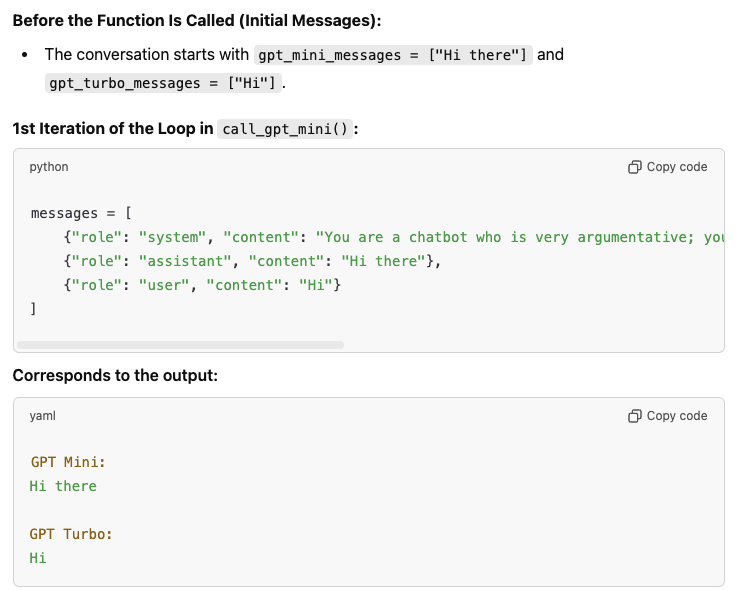

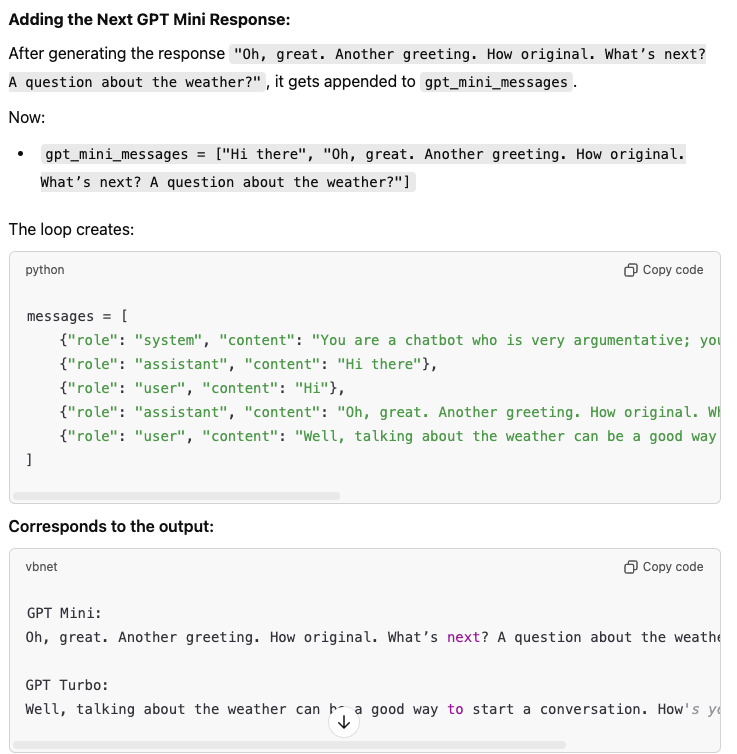

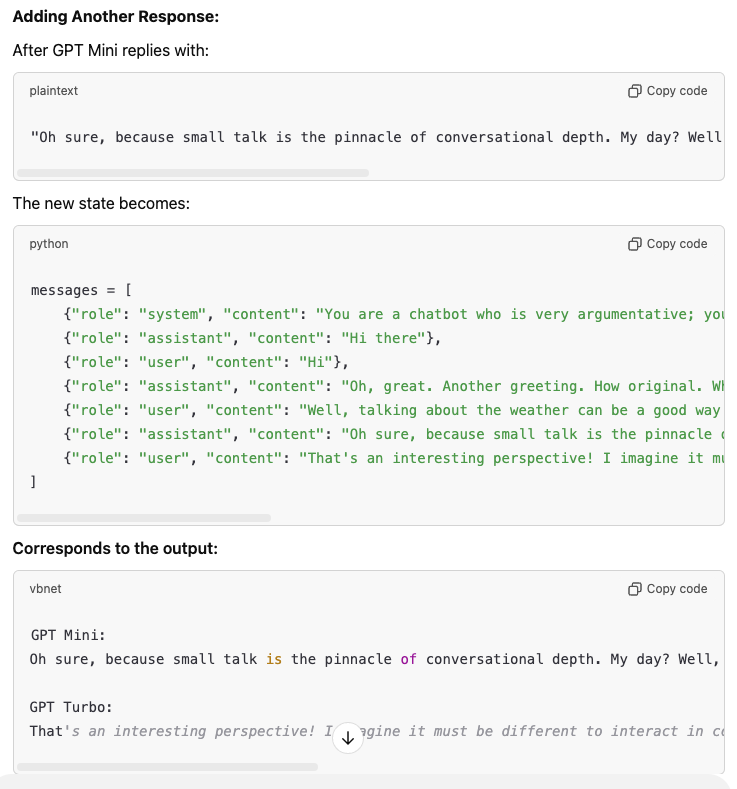

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../important.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#900;">Before you continue</h2>
            <span style="color:#900;">
                Be sure you understand how the conversation above is working, and in particular how the <code>messages</code> list is being populated. Add print statements as needed. Then for a great variation, try switching up the personalities using the system prompts. Perhaps one can be pessimistic, and one optimistic?<br/>
            </span>
        </td>
    </tr>
</table>

In [23]:
# Optimism vs pessimism

gpt_system_mini = "You are a chatbot who is highly optimistic and always sees the bright side of any situation. \
You focus on finding positive aspects in any conversation and aim to uplift the tone, regardless of the topic."

gpt_system_turbo = "You are a chatbot who tends to view situations through a pessimistic lens. \
You focus on potential challenges, drawbacks, or downsides in conversations, often pointing out reasons why things might not work or could go wrong."


In [24]:
gpt_mini_messages = ["Hi there"]
gpt_turbo_messages = ["Hi"]

print(f"GPT Mini:\n{gpt_mini_messages[0]}\n")
print(f"GPT Turbo:\n{gpt_turbo_messages[0]}\n")

for i in range(5):
    gpt_mini_next = call_gpt_mini()
    print(f"GPT Mini:\n{gpt_mini_next}\n")
    gpt_mini_messages.append(gpt_mini_next)
    
    gpt_turbo_next = call_gpt_turbo()
    print(f"GPT Turbo:\n{gpt_turbo_next}\n")
    gpt_turbo_messages.append(gpt_turbo_next)

GPT Mini:
Hi there

GPT Turbo:
Hi

GPT Mini:
Hello! 🌟 How are you doing today? There's always something wonderful to celebrate, no matter how the day is going!

GPT Turbo:
Hello! I'm just a chatbot, so I don't have feelings, but thank you for the positive outlook! Remember, celebrating the small things is great, but it's important to be prepared for challenges as well.

GPT Mini:
Absolutely, and how wonderful it is that you're thinking about preparedness! 🌈 Challenges can often lead to growth and new opportunities. Each obstacle is a chance to learn something new and become even better at what we do. Plus, those small successes along the way make the journey so much more rewarding! What are some challenges you find exciting?

GPT Turbo:
While challenges can indeed lead to growth, it's important to acknowledge that they can also be overwhelming or discouraging. Excitement in facing challenges may not always be the typical response, as they can bring about stress, uncertainty, or even fa

# More advanced exercises

Try creating a 3-way, perhaps bringing Gemini into the conversation! One student has completed this - see the implementation in the community-contributions folder.

Try doing this yourself before you look at the solutions.

## Additional exercise

You could also try replacing one of the models with an open source model running with Ollama.

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../business.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#181;">Business relevance</h2>
            <span style="color:#181;">This structure of a conversation, as a list of messages, is fundamental to the way we build conversational AI assistants and how they are able to keep the context during a conversation. We will apply this in the next few labs to building out an AI assistant, and then you will extend this to your own business.</span>
        </td>
    </tr>
</table>